1. Questions on tensor operations

1.1 (i) Write a program to create a variable with a size of 2x3 and a constant (2 marks)

In [4]:
import tensorflow as tf

# Define the constant value
constant_value = 5  # You can change this to any value you want

# Create a variable of size 2x3 filled with the constant value
variable_2x3 = tf.Variable(tf.fill(dims=(2, 3), value=constant_value))

# The variable is automatically initialized when created in TensorFlow 2.x

# Access the value of the variable
result = variable_2x3.numpy()

# Print the resulting variable
print("Variable with a size of 2x3 filled with a constant:")
print(result)


Variable with a size of 2x3 filled with a constant:
[[5 5 5]
 [5 5 5]]


(ii) Write a program to create a variable "tf3" with a size 3x3 and convert it to a numpy size of
3x3. Display rank of the matrix

In [5]:
import tensorflow as tf
import numpy as np

# Create a TensorFlow variable with a 3x3 tensor
tf3 = tf.constant(np.arange(1, 10).reshape(3, 3))

# Convert the TensorFlow tensor to a NumPy array
tf3_numpy = tf3.numpy()

# Display the NumPy array
print("NumPy array representation of tf3:")
print(tf3_numpy)

# Calculate and display the rank of the matrix using NumPy
rank = np.linalg.matrix_rank(tf3_numpy)
print(f"Rank of the matrix: {rank}")


NumPy array representation of tf3:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Rank of the matrix: 2


(iii) Write a program to randomly generate 3x3 matrix and assign 0 to the first row first column
element

In [6]:
import numpy as np

# Create a random 3x3 matrix with whole numbers between 1 and 9
random_matrix = np.random.randint(1, 10, size=(3, 3))

# Display the matrix
print("3x3 matrix:")
print(random_matrix)

# Assign 0 to the first row, first column element
random_matrix[0, 0] = 0

# Display the resulting matrix
print("Modified 3x3 matrix:")
print(random_matrix)

3x3 matrix:
[[8 1 5]
 [3 9 9]
 [3 8 3]]
Modified 3x3 matrix:
[[0 1 5]
 [3 9 9]
 [3 8 3]]


1.2 (i) write python code and Compute the cross entropy for the below values (2 marks).
Distribution_1 = [4.13, 6.8, -2.1]
Distribution_2 = [1, 0, 0]

In [7]:
import tensorflow as tf
import numpy as np

# Define the two distributions
Distribution_1 = np.array([4.13, 6.8, -2.1], dtype=np.float32)
Distribution_2 = np.array([1, 0, 0], dtype=np.float32)

# Compute the cross-entropy using TensorFlow's function for classification
cross_entropy = tf.keras.losses.categorical_crossentropy(Distribution_2, Distribution_1, from_logits=True)

# Display the cross-entropy
print("Cross-Entropy:", cross_entropy.numpy())


Cross-Entropy: 2.7370872


ii) Write a program to create a variable "tensor" with a size 5x6 and reshape it to a size of 3x10

In [8]:
import tensorflow as tf

# Create a TensorFlow variable with a size of 5x6 filled with random integers
tensor = tf.Variable(tf.random.uniform(shape=(5, 6), minval=0, maxval=100, dtype=tf.int32))
print("Tensor (5x6):")
print(tensor.numpy())
print("")
# Reshape the tensor to a size of 3x10
reshaped_tensor = tf.reshape(tensor, (3, 10))

# Access the value of the reshaped tensor
result = reshaped_tensor.numpy()

# Print the resulting reshaped tensor
print("Reshaped Tensor (3x10):")
print(result)


Tensor (5x6):
[[20 53  8 64 42 82]
 [62 71 51 37 90 89]
 [25 39 41 71 30 61]
 [70  9 32 53 17 10]
 [39 33 26 80 61 50]]

Reshaped Tensor (3x10):
[[20 53  8 64 42 82 62 71 51 37]
 [90 89 25 39 41 71 30 61 70  9]
 [32 53 17 10 39 33 26 80 61 50]]


2. Questions on basic neural network model designing and compiling

Dataset :
The dataset has been attached to the assignment with two folders which consists of two objects i.e.,
dogs and wolves images. Please develop a Neural network model to identify the shapes as either
dog or wolf. The task has been categorized into binary classification

2.1 Print shape of the data and understand how many images of different classes exist in this
dataset. Visualize some images using matplotlib.Convert the RGB Image to Grayscale ( For easier
computation) . Normalize the data so that data is in range 0-1.Reshape train and test images into one
dimensional vector

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from PIL import Image


train_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\Ajay Thomas\Jupy\Deep Learning\Dataset-20231006T064832Z-001\Dataset\Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\Ajay Thomas\Jupy\Deep Learning\Dataset-20231006T064832Z-001\Dataset\Valid',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 940 files belonging to 2 classes.
Found 63 files belonging to 2 classes.


In [10]:
#Normalizing the data

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

C:\Users\Ajay Thomas\AppData\Local\Temp\ipykernel_11712\2904315666.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


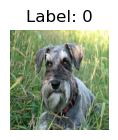

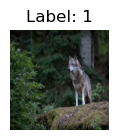

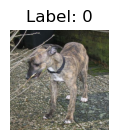

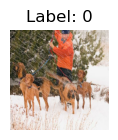

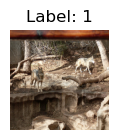

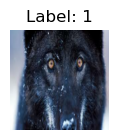

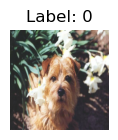

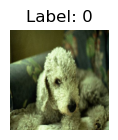

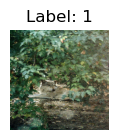

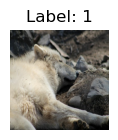

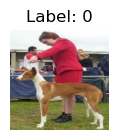

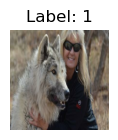

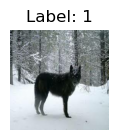

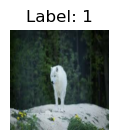

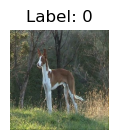

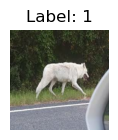

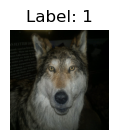

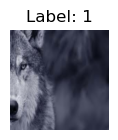

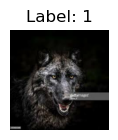

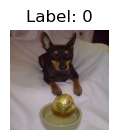

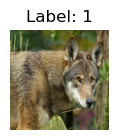

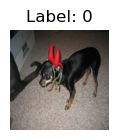

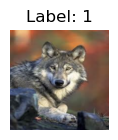

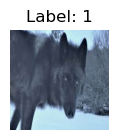

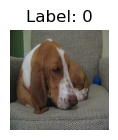

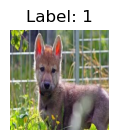

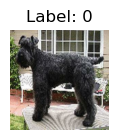

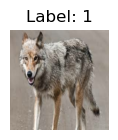

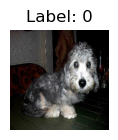

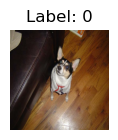

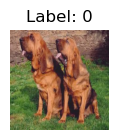

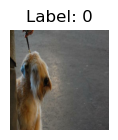

In [11]:
# Iterate through the dataset and display the first batch of images
train_ds_plott = train_ds

for images, labels in train_ds_plott.take(1):
    for i in range(images.shape[0]):
        plt.figure(figsize=(12, 6))
        plt.subplot(4, 8, i+1)  # Adjust the subplot layout as needed
        plt.imshow(images[i].numpy(), cmap='gray', aspect='auto')  # Display the image
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis('off')
    
plt.show()

In [12]:
# Convert the image to grayscale
def convert_to_grayscale(image, label):
    grayscale_image = tf.image.rgb_to_grayscale(image)
    return grayscale_image, label

train_ds = train_ds.map(convert_to_grayscale)
validation_ds = validation_ds.map(convert_to_grayscale)

In [13]:
#Data Augmentation
from tensorflow import keras
from tensorflow.keras import layers

data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape =(256,256,1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.2)
])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model = Sequential([
    data_aug,
    layers.Conv2D(100, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    layers.Conv2D(50, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    
    layers.Conv2D(50, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    
    layers.Conv2D(50, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    
        layers.Conv2D(50, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary() 




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 100)     1000      
                                                                 
 batch_normalization (Batch  (None, 254, 254, 100)     400       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 100)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 50)      45050     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 50)   

In [15]:
# Initialize empty lists to store images and labels
x_train, y_train = [], []
x_test, y_test = [], []

# Split the training dataset
for images, labels in train_ds:
    x_train.append(images.numpy())
    y_train.append(labels.numpy())

# Split the validation dataset
for images, labels in validation_ds:
    x_test.append(images.numpy())
    y_test.append(labels.numpy())

# Concatenate the lists to create NumPy arrays
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)


# Verify the shapes of the arrays
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (940, 256, 256, 1)
y_train shape: (940,)
x_test shape: (63, 256, 256, 1)
y_test shape: (63,)


In [16]:
# Train the model
history = model.fit(train_ds, epochs=30, batch_size=32, validation_data=validation_ds)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/30


30/30 [==============================] - 34s 1s/step - loss: 0.8283 - accuracy: 0.5021 - val_loss: 0.6713 - val_accuracy: 0.6349
Epoch 2/30
30/30 [==============================] - 32s 1s/step - loss: 0.6980 - accuracy: 0.5894 - val_loss: 0.6491 - val_accuracy: 0.6349
Epoch 3/30
30/30 [==============================] - 30s 987ms/step - loss: 0.6708 - accuracy: 0.6245 - val_loss: 0.8502 - val_accuracy: 0.3651
Epoch 4/30
30/30 [==============================] - 31s 1s/step - loss: 0.6505 - accuracy: 0.6340 - val_loss: 0.7035 - val_accuracy: 0.4444
Epoch 5/30
30/30 [==============================] - 31s 1s/step - loss: 0.6569 - accuracy: 0.6457 - val_loss: 0.6829 - val_accuracy: 0.5556
Epoch 6/30
30/30 [==============================] - 31s 1s/step - loss: 0.6294 - accuracy: 0.6553 - val_loss: 0.6580 - val_accuracy: 0.6349
Epoch 7/30
30/30 [==============================] - 31s 1s/step - loss: 0.5814 - accuracy: 0.6979 - val_loss: 0.6626 - val_accuracy: 0.6190
Epoch 8/30
30/3

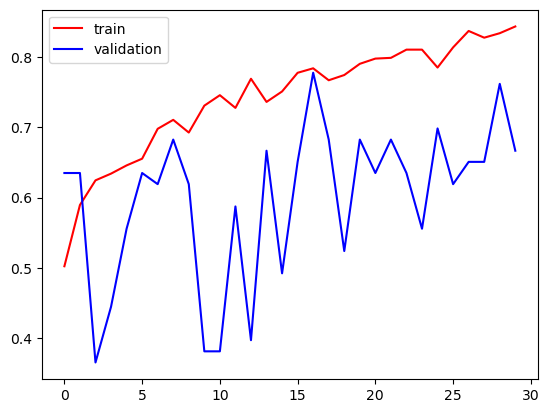

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

2/2 [==============================] - 1s 308ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.09      0.16        23
           1       0.66      1.00      0.79        40

    accuracy                           0.67        63
   macro avg       0.83      0.54      0.48        63
weighted avg       0.78      0.67      0.56        63

F1 Score: 0.7920792079207921


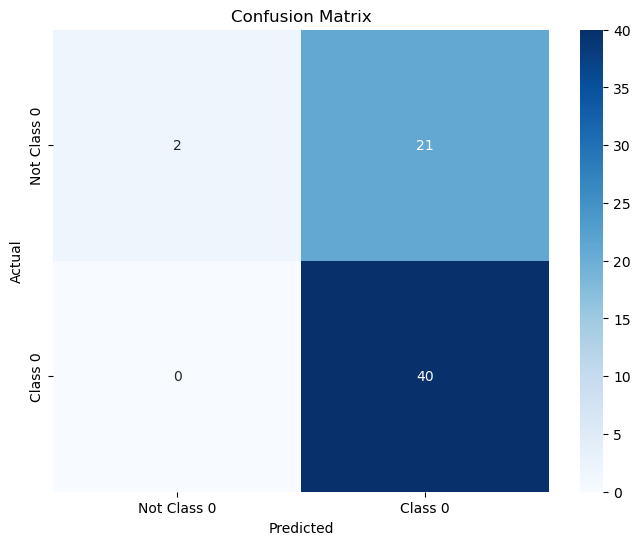

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels on the test data
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)

# Print the classification report and F1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Class 0', 'Class 0'], yticklabels=['Not Class 0', 'Class 0'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
